In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df_train = pd.read_csv('pml_train.csv')

In [4]:
df_test = pd.read_csv('pml_test_features.csv')

In [14]:
df_train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,0,A,A,A,A,B,A,A,A,A,...,0.669748,0.515940,0.55421,0.53774,0.47225,0.492200,0.481306,0.756454,0.344502,7.674989
1,1,B,A,A,A,A,B,A,A,A,...,0.484775,0.698278,0.35533,0.40657,0.40666,0.468839,0.458493,0.304350,0.470455,6.928430
2,2,A,A,A,B,A,A,A,A,A,...,0.350956,0.363768,0.58354,0.44352,0.39599,0.341813,0.352251,0.339244,0.283969,8.407117
3,3,B,A,A,A,A,B,A,A,A,...,0.748243,0.538694,0.54829,0.50420,0.51111,0.711942,0.698722,0.709578,0.776114,6.811366
4,4,A,B,A,A,A,A,A,A,B,...,0.321058,0.326430,0.31280,0.39648,0.38016,0.245410,0.241676,0.261150,0.342082,6.883073


In [15]:
df_train.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,131822.00000,131822.000000,131822.000000,131822.000000,131822.000000,131822.000000,131822.000000,131822.000000,131822.000000,131822.00000,131822.000000,131822.000000,131822.000000,131822.000000,131822.000000,131822.000000
mean,65910.50000,0.493342,0.507205,0.499348,0.491129,0.486648,0.490494,0.485201,0.486195,0.48512,0.497715,0.493509,0.493151,0.492624,0.495778,7.686542
std,38053.87793,0.187592,0.207240,0.202093,0.211094,0.208703,0.205043,0.178781,0.199229,0.18146,0.185664,0.209614,0.209308,0.212643,0.222450,0.811082
min,0.00000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.00008,0.000000,0.035321,0.036232,0.000228,0.180268,1.832581
25%,32955.25000,0.344779,0.358319,0.336963,0.327354,0.281143,0.335056,0.350378,0.312800,0.35897,0.364580,0.310961,0.312482,0.315758,0.294752,7.094973
50%,65910.50000,0.475784,0.555782,0.527991,0.452887,0.422268,0.439786,0.438480,0.441060,0.43731,0.461190,0.457203,0.462286,0.363547,0.407411,7.658032
75%,98865.75000,0.623912,0.681761,0.634224,0.652072,0.635304,0.653958,0.591284,0.623580,0.55855,0.614590,0.678924,0.675759,0.689974,0.724610,8.260003
max,131821.00000,0.984975,0.862654,0.944251,0.952482,0.983674,0.997162,1.000000,0.980200,0.99540,0.994980,0.998742,0.998484,0.988494,0.844844,11.703655


In [16]:
cont_features = []
cat_features = []
for c in df_train.columns:
    if 'cont' in c:
        cont_features.append(c)
    elif 'cat' in c:
        cat_features.append(c)

In [17]:
len(cont_features) # 14 continuous features

14

In [18]:
len(cat_features) #116 categorical features

116

In [19]:
cont_features

['cont1',
 'cont2',
 'cont3',
 'cont4',
 'cont5',
 'cont6',
 'cont7',
 'cont8',
 'cont9',
 'cont10',
 'cont11',
 'cont12',
 'cont13',
 'cont14']

#### Since we have both continous and categorical features lets see how we can deal with continuous

In [1]:
plt.figure(figsize=(14,9))
sns.boxplot(data=df_train[cont_features])
plt.title('Box-Plot of Continous Features')

NameError: name 'plt' is not defined

In [21]:
df_train.skew()

id        0.000000
cont1     0.518830
cont2    -0.309839
cont3    -0.014510
cont4     0.421794
cont5     0.686283
cont6     0.463641
cont7     0.824971
cont8     0.679365
cont9     1.075070
cont10    0.358105
cont11    0.280530
cont12    0.292257
cont13    0.383133
cont14    0.247764
loss      0.104820
dtype: float64

In [22]:
# Skews close to 0 are better
# Loss has the highest skew:


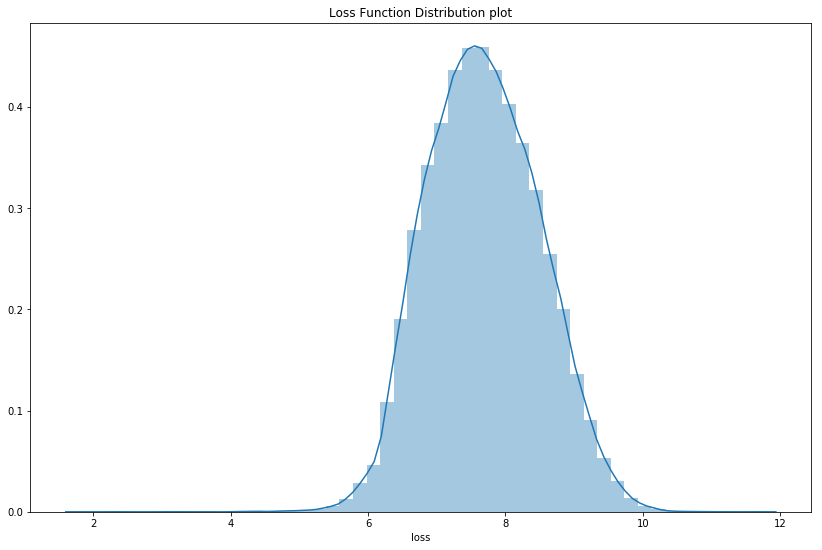

In [23]:
plt.figure(figsize=(14,9))
sns.distplot(df_train['loss'])
plt.title('Loss Function Distribution plot')

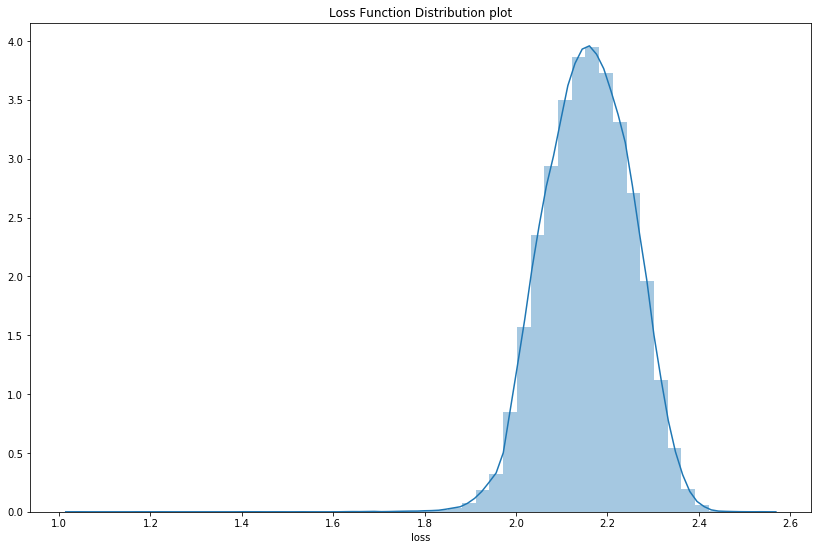

In [24]:
# since all values of loss are so small, use log1p to 
# normalize distribution of loss
plt.figure(figsize=(14,9))
sns.distplot(np.log1p(df_train['loss']))
plt.title('Loss Function Distribution plot')

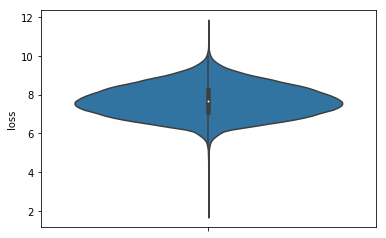

In [25]:
sns.violinplot(data=df_train,y='loss')
plt.show()

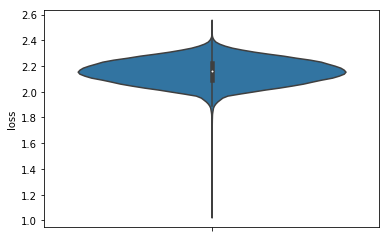

In [26]:
df_train['loss']= np.log1p(df_train['loss'])
sns.violinplot(data=df_train,y='loss')
plt.show()
# improved skew, but still some exists in the bottom quartile

In [27]:
cont_features.append('loss')
corr_cont = df_train[cont_features].corr()

In [28]:
corr_cont

,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
cont1,1.000000,-0.087295,-0.446104,0.367370,-0.026451,0.758735,0.366697,0.359196,0.930134,0.809178,0.595201,0.613389,0.534108,0.057368,-0.005286
cont2,-0.087295,1.000000,0.457124,0.038294,0.190392,0.014106,0.046314,0.138197,-0.034460,0.061041,0.114710,0.104221,0.022249,-0.044432,0.099270
cont3,-0.446104,0.457124,1.000000,-0.341400,0.089215,-0.351001,0.096357,-0.185084,-0.417942,-0.327565,0.024803,0.005621,-0.419619,-0.039931,0.077400
cont4,0.367370,0.038294,-0.341400,1.000000,0.165936,0.220855,-0.115359,0.528926,0.329293,0.283774,0.120666,0.130446,0.179399,0.019609,-0.023568
cont5,-0.026451,0.190392,0.089215,0.165936,1.000000,-0.149247,-0.248730,0.010671,-0.089271,-0.065655,-0.151239,-0.147740,-0.083173,-0.018081,-0.014074
cont6,0.758735,0.014106,-0.351001,0.220855,-0.149247,1.000000,0.656555,0.435154,0.798092,0.883501,0.772054,0.783538,0.814269,0.041113,0.031882
cont7,0.366697,0.046314,0.096357,-0.115359,-0.248730,0.656555,1.000000,0.139375,0.383775,0.490053,0.746344,0.741841,0.283733,0.019531,0.082895
cont8,0.359196,0.138197,-0.185084,0.528926,0.010671,0.435154,0.139375,1.000000,0.450619,0.334668,0.299011,0.312550,0.474415,0.043791,0.032190
cont9,0.930134,-0.034460,-0.417942,0.329293,-0.089271,0.798092,0.383775,0.450619,1.000000,0.786895,0.606624,0.625365,0.641954,0.075436,0.019314
cont10,0.809178,0.061041,-0.327565,0.283774,-0.065655,0.883501,0.490053,0.334668,0.786895,1.000000,0.700725,0.711720,0.707498,0.041852,0.011442


In [30]:
corrMat = corr_cont.as_matrix()
corr_list = []

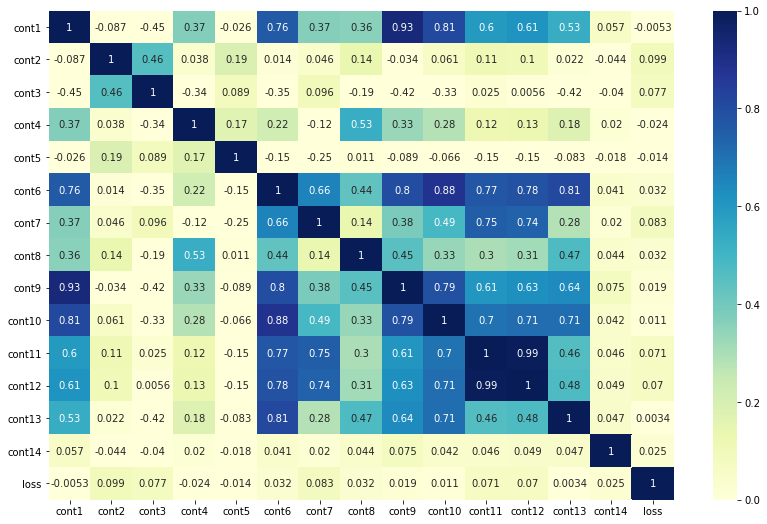

In [29]:
plt.figure(figsize=(14,9))
sns.heatmap(corr_cont,annot=True,vmin=0,vmax=1,cmap='YlGnBu')
plt.show()


In [31]:
# We one drop one of a pair of highly correlated variables
#https://www.kaggle.com/sharmasanthosh/exploratory-study-on-ml-algorithms

In [33]:
numLabels = df_train[cat_features].nunique()

In [34]:
numLabels.describe()

count    116.000000
mean       9.456897
std       31.793188
min        2.000000
25%        2.000000
50%        2.000000
75%        4.000000
max      307.000000
dtype: float64

In [35]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [36]:
labels =[]
for c in cat_features:
    train = df_train[c].unique()
    test = df_test[c].unique()
    labels.append(list(set(train) | set(test)))
    

In [37]:
cats = []
cats_test =[]
for i,v in enumerate(cat_features):
    #Label encode
    label_encoder = LabelEncoder()
    label_encoder.fit(labels[i])
    feature = label_encoder.transform(df_train[v])
    f_test = label_encoder.transform(df_test[v])
    feature = feature.reshape(df_train.shape[0], 1)
    f_test = f_test.reshape(df_test.shape[0],1)
    #One hot encode
    onehot_encoder = OneHotEncoder(sparse=False,n_values=len(labels[i]))
    feature = onehot_encoder.fit_transform(feature)
    f_test = onehot_encoder.fit_transform(f_test)
    cats.append(feature)
    cats_test.append(f_test)

In [38]:
encoded_cats = np.column_stack(cats)
encoded_catsTest=np.column_stack(cats_test)

In [27]:
print(encoded_cats.shape)

(131822, 1139)


In [28]:
print(encoded_catsTest.shape)

(56496, 1139)


In [29]:
dataset_encoded = np.concatenate((encoded_cats,df_train[cont_features].values),axis=1)

In [30]:
cont_features.remove('loss')
dataTestE = np.concatenate((encoded_catsTest,df_test[cont_features].values),axis=1)

In [31]:
dataset_encoded.save('')

In [32]:
dataTestE.tofile('dataTestE')

In [8]:
dataset_encoded = np.fromfile('dataset_encoded')

In [9]:
dataTestE = np.fromfile('dataTestE')

In [44]:
dataTestE=dataTestE.reshape(56496,1153)
dataset_encoded = dataset_encoded.reshape(131822,1154)

In [45]:
dataset_encoded.shape

(131822, 1154)

In [46]:
dataTestE.shape

(56496, 1153)

In [47]:
rows, columns = dataset_encoded.shape

In [48]:
columns

1154

In [49]:
data = dataset_encoded[:,0:(columns-1)] # remove loss column
loss = dataset_encoded[:,(columns-1)] # loss column

In [37]:
del dataset_encoded

In [50]:
from sklearn import cross_validation
val_size = 0.1
seed  = 2016
X_train, X_val, Y_train, Y_val = cross_validation.train_test_split(data, loss, test_size=val_size, random_state=seed)

/Users/niralshah/anaconda/envs/capstone/lib/python2.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [39]:
## LASSO Linear Regression:

In [51]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
import time

In [41]:
alphas = [0.0001,0.001,0.01,0.1,1]

In [52]:
results=[]

In [28]:
for i,a in enumerate(alphas):
    start = time.time()
    clf = Lasso(alpha=a,random_state=seed)
    clf.fit(X_train,Y_train)
    end = time.time()
    elapsed = end-start
    results.append(mean_absolute_error(np.expm1(Y_val), np.expm1(clf.predict(X_val))))
    print "Performance:"+str(results[i])
    print "Time:"+str(elapsed)

/Users/niralshah/anaconda/envs/capstone/lib/python2.7/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


Performance:1225.306767904611
Time:171.96288085
Performance:1226.9920518686936
Time:31.1218321323
Performance:1318.4090279846314
Time:13.7477860451
Performance:1644.9781856849947
Time:12.8921720982
Performance:1776.6256454363674
Time:6.19267010689


In [77]:
clf = Lasso(alpha=alphas[2],random_state=seed)
clf.fit(X_train,Y_train)

Lasso(alpha=0.01, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=2016,
   selection='cyclic', tol=0.0001, warm_start=False)

In [78]:
predictions = clf.predict(dataTestE)

In [79]:
predLoss = pd.Series(predictions,name='loss')

In [80]:
submission  = pd.concat([df_test['id'],predLoss],axis=1)

In [66]:
type(submission)

pandas.core.frame.DataFrame

In [81]:
submission

,id,loss
0,131822,7.111741
1,131823,7.454183
2,131824,8.127508
3,131825,7.296020
4,131826,7.955291
5,131827,8.050174
6,131828,7.140294
7,131829,7.794941
8,131830,7.814928
9,131831,7.991233


In [82]:
submission.to_csv('submission.csv',index=False)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
depths = [5]
cart_results =[]
for i,d in enumerate(depths):
    start = time.time()
    clf = DecisionTreeRegressor(criterion='mae',max_depth=d,random_state=seed)
    clf.fit(X_train,Y_train)
    end = time.time()
    elapsed = end-start
    cart_results.append(mean_absolute_error(np.expm1(Y_val), np.expm1(clf.predict(X_val))))
    print "Performance:"+str(cart_results[i])
    print "Time:"+str(elapsed)

In [89]:
clf

DecisionTreeRegressor(criterion='mse', max_depth=1, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=2016, splitter='best')

In [85]:
predictions = clf.predict(dataTestE)

In [86]:
predLoss = pd.Series(predictions,name='loss')
submission  = pd.concat([df_test['id'],predLoss],axis=1)

In [87]:
submission

,id,loss
0,131822,7.450818
1,131823,7.450818
2,131824,8.328981
3,131825,7.450818
4,131826,8.328981
5,131827,8.328981
6,131828,7.450818
7,131829,8.328981
8,131830,7.450818
9,131831,8.328981


In [88]:
submission.to_csv('submission.csv',index=False)